<a href="https://colab.research.google.com/github/kasparvonbeelen/data-culture-newspapers/blob/directories/Data_Culture_Autumn_Workshop_Explore_Mitchell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Session
## 🌻 Fun with Press Directories 🦄

### First of all...

...what am I looking at here?


*Welcome to* **Markdown**

You write text...

In [ ]:
# and code
print('Hello, World')

Hello, World


❗ You will need to run all the cells in order ❗

Now you know enough technical stuff to follow along.

## Finding the Directories Online



You can consult the directories [online](https://bl.iro.bl.uk/concern/datasets/adcef12a-bb3d-40d9-871d-5784022a77e8)

Let's have a look at the documentation first and open the attached PDF.

We will have a closer look at how the explore these in code (Python). However, if you are more comfortable with Excel (😵‍💫) feel free to explore the data there.

### Why Python

- This session is not an introduction to Python of programming

The goals is more to show what you can do with the Press Directories, using a bit of code.

For those who know Python, just relax and follow along.

For those new to coding, try to understand what is happening, focussing on the outcomes (not the code). All code is explained with comments, but don't try to understand the syntax.

If you are intrigued, I can recommend [this book](https://jakevdp.github.io/PythonDataScienceHandbook/) if you want more an working with dataframes/tabular data in Python!

## Exploring the Directories with Pandas

![pandas](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExanp1NHdzbnA4cWUxdGNoazYwN2c0Y2E5am96YW5rNTNkd2Q4YXJtdiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/aCa8jFalHHJvi/giphy.gif)

### Importing data

In [ ]:
# import the pandas library
import pandas as pd

In [ ]:
# open the CSV file online
# can also download the file and use it locally
df = pd.read_csv('https://bl.iro.bl.uk/downloads/da65047c-4d62-4ab7-946f-8e61e5f6f331?locale=en', index_col=0)

In [ ]:
# replace the NaN (not a number) values with empty spaces
# otherwise code will break later on
df.fillna('', inplace=True)

In [ ]:
# the number rows and columns
df.shape

(92266, 16)

In [ ]:
# example of first two rows
df.head(2)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
0,MPD_1846_57,CID_000000,1846,JUSTICE OF THE PEACE .,6d,,"January 28 , 1837",Saturday,Henry Shaw,,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."
1,MPD_1847_65,CID_000000,1847,JUSTICE OF THE PEACE .,6d,,"January 28 , 1837",Saturday,Henry Shaw,,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."


In [ ]:
# view all the columns in the dataframe
df.columns

Index(['ID', 'CHAIN_ID', 'YEAR', 'TITLE', 'PRICE', 'POLITICS',
       'ESTABLISHED_DATE', 'PUBLISED_DATE', 'PERSONS', 'ORGANIZATIONS',
       'PLACE_PUB', 'PLACE_PUB_WIKI', 'PLACE_PUB_COORD', 'PLACES',
       'PLACES_TRES', 'TEXT'],
      dtype='object')

### How old is a newspaper title?

**Question**: How 'old' is the average newspaper title? How does this change over time, place and by politics?

**Question**:
- What information do need?
-Is the information all neatly processed and parsed?


Run the code cell below to get a negative answer ;-)



In [ ]:
# get all the unique values in the ESTABLISHED_DATE column
df['ESTABLISHED_DATE'].unique()

array(['January 28 , 1837', 'January 28 ; 1837', 'November , 1842', ...,
       '1861<SEP>October , 1919', 'August 15 , 1898', 'Feb . 3 , 1917'],
      dtype=object)

In [ ]:
# get the value counts and select the top ten
df['ESTABLISHED_DATE'].value_counts()[:10]

,count
ESTABLISHED_DATE,
,5130
1855,2265
1857,1386
1856,1200
1860,1137
1868,1054
1880,1045
1859,1038
1858,1002


### Searching with regular expressions

We can extract the year using regular expressions.
This is a technique to create complex queries. We define a pattern that we want to find in our text data. In this case we want to find all the years between 1700-1999.

Therefore:
- we look for numbers consisting of four digits starting with 1
- followed by 7,8 or 9
- and finishing with any combination of two digits

In [ ]:
# import the regular expression library
import re
# create the year matching pattern
year_pattern = re.compile(r'\b1[789][0-9]{2}\b')

Let's evaluate the regular expression pattern on an example string
- Question 1: change the string and test it for yourself?
- Question 2: can/should you change the regular expression?

In [ ]:
# create a string to test the regex
test_string = '1960 1543 0323 1789 187e 18982 1892'
# apply regex to string
year_pattern.findall(test_string)

['1960', '1789', '1892']

We can apply this regex to all the values in the ESTABLISHED_DATE column. However, there are few problems (which are very common when working with cultural heritage datasets).
- some rows do not have a value for this columns -> **missing data**
- some rows contain multiple years -> complex, irregular data

Solutions?
- if the cell is empty we take the value in the YEAR column
- we just focus on the first year mentioned

Please note: Both are choices, which need to be explained and motivated!

In [ ]:
# apply the regex to the ESTABLISHED_DATE data column, and save result in the ESTABLISHED_YEAR
df['ESTABLISHED_YEAR'] = df['ESTABLISHED_DATE'].apply(lambda x: year_pattern.findall(x))
# take either the first year find or take the YEAR value if no dates have been found
# convert the numbers to integers
df['ESTABLISHED_YEAR'] = df.apply(lambda x: int(x['ESTABLISHED_YEAR'][0]) if len(x['ESTABLISHED_YEAR']) > 0 else x['YEAR'], axis=1)

In [ ]:
# inspect the result of this operation
df['ESTABLISHED_YEAR'].unique()

array([1837, 1842, 1844, 1849, 1806, 1836, 1748, 1744, 1718, 1717, 1790,
       1792, 1853, 1833, 1838, 1798, 1708, 1800, 1832, 1831, 1863, 1846,
       1856, 1877, 1845, 1816, 1820, 1830, 1789, 1769, 1772, 1834, 1828,
       1827, 1764, 1754, 1891, 1893, 1894, 1810, 1751, 1753, 1758, 1733,
       1841, 1840, 1821, 1711, 1725, 1721, 1720, 1714, 1819, 1795, 1705,
       1847, 1851, 1857, 1858, 1860, 1861, 1862, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1885, 1886, 1888, 1889, 1890, 1895, 1896,
       1898, 1899, 1900, 1902, 1903, 1905, 1907, 1908, 1910, 1912, 1914,
       1915, 1920, 1822, 1812, 1709, 1747, 1803, 1808, 1835, 1809, 1843,
       1848, 1801, 1802, 1782, 1783, 1817, 1797, 1811, 1829, 1826, 1737,
       1773, 1824, 1766, 1779, 1839, 1825, 1778, 1776, 1767, 1815, 1850,
       1887, 1852, 1855, 1854, 1876, 1799, 1745, 1807, 1739, 1713, 1774,
       1859, 1730, 1786, 1823, 1818, 1722, 1794, 17

Now we can compute how old a newspaper is in a given year by subtracting ESTABLISHED_YEAR from YEAR. We save this in a new column with the name SENIORITY.

In [ ]:
# save difference between YEAR and ESTABLISHED_YEAR in SENIORITY columns
df['SENIORITY'] = df.apply(lambda x: int(x['YEAR']) - int(x['ESTABLISHED_YEAR']), axis=1)

In [ ]:
# average age
df['SENIORITY'].mean()

27.681963019964016

In [ ]:
# longest run observed
df['SENIORITY'].max()

209

Now we can compute for each year the average SENIORITY of a newspaper titles, and plot the result

<Axes: xlabel='YEAR'>

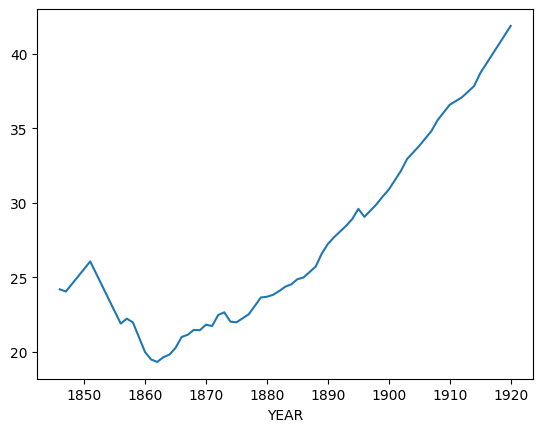

In [ ]:
# groupby by year and compute the mean for the seniority column
df.groupby(['YEAR'])['SENIORITY'].mean().plot()

To make plotting prettier and easier, we can use the seaborn library.

<Axes: xlabel='YEAR', ylabel='SENIORITY'>

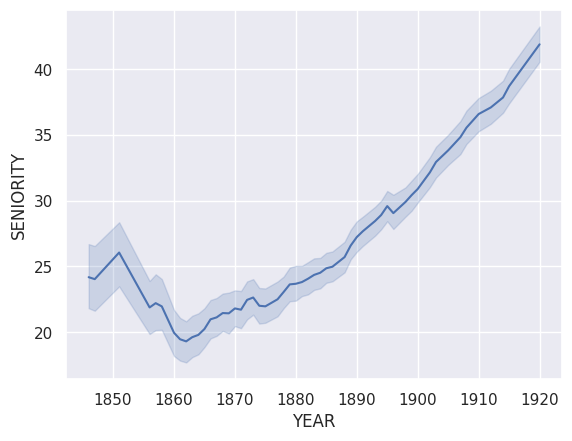

In [ ]:
import seaborn as sns
sns.set()
sns.lineplot(x='YEAR',y='SENIORITY', data=df)

Let's now inspect at how seniority relates to the political orientation of a newspaper.

<Axes: xlabel='YEAR', ylabel='SENIORITY'>

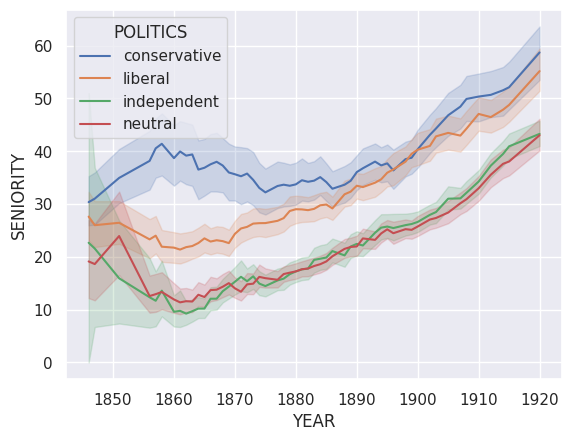

In [ ]:
# subset data to row containing a specific set of political labels
data = df[df['POLITICS'].isin(['liberal', 'conservative','independent','neutral'])]
# make a lineplot
sns.lineplot(x='YEAR', # values for the x-axis
             y='SENIORITY', # values for the y-axis
             hue='POLITICS', # split data by values in this cell
             hue_order=['conservative', 'liberal','independent','neutral'], # the order of the colors/distinctions
             data=data # use this data
             )

Lastly, let's analyse and visualise how the seniority of the press differs by place. For this we will need to do a bit to complete a few more precessing steps. Again, don't worry if Python is new to you, just run the code!

After running the code, download the file it produces ('by_place.csv') and load it into [kepler.gl](https://kepler.gl/)

In [ ]:
# remove rows without coordinates
df = df[df['PLACE_PUB_COORD'] != '(nan, nan)']
# groupy by place name and coordinates
by_place = df.groupby(['PLACE_PUB','PLACE_PUB_COORD']).agg({'SENIORITY':'mean', 'ID': 'count'}).reset_index()
# convert the coordinates from string to a tuple
by_place['PLACE_PUB_COORD'] = by_place['PLACE_PUB_COORD'].apply(eval)
# save coordinates in different columns
by_place['point_latitude'] = by_place.PLACE_PUB_COORD.apply(lambda x: x[0])
by_place['point_longitude'] = by_place.PLACE_PUB_COORD.apply(lambda x: x[1])
# remove the original column
by_place.drop('PLACE_PUB_COORD', axis=1, inplace=True)
# rename ID columns to COUNT
by_place.rename(columns={'ID':'COUNT'}, inplace=True)
# only keep places with more than 10 observation
by_place = by_place[by_place.COUNT > 10]
# save the result in csv file
by_place.to_csv('by_place.csv')
# now download the file and load it into kepler

In [ ]:
by_place

,PLACE_PUB,SENIORITY,COUNT,point_latitude,point_longitude
1,aberdare,20.183673,98,51.713056,-3.445000
2,aberdeen,39.910941,393,57.150000,-2.100000
4,abergavenny,18.500000,38,51.833056,-3.017222
5,abergele,25.980000,50,53.280000,-3.580000
6,abertillery,13.769231,26,51.730000,-3.130000
...,...,...,...,...,...
1268,wycombe,19.156250,64,51.638500,-0.807900
1269,wymondham,8.615385,13,52.570000,1.116000
1270,yarmouth,19.380597,134,52.633333,1.750000
1272,yeovil,86.270833,96,50.945200,-2.637000


### Women in the press

In [ ]:
# load the dataframe
df = pd.read_csv('https://bl.iro.bl.uk/downloads/da65047c-4d62-4ab7-946f-8e61e5f6f331?locale=en', index_col=0)

In [ ]:
# replace not a number nan with empty spaces
df.fillna('', inplace=True)

In [ ]:
# show three random rows
df.sample(3)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
13158,MPD_1914_1065,CID_000294,1914,HEXHAM COURANT .,1d,liberal,"August , 1864",Friday<SEP>Saturday,,J . Catherall & Co,hexham,Q947400,"(54.966667, -2.1)",Northumberland<SEP>Cumberland<SEP>Durham<SEP>S...,"[{'mention': 'Northumberland', 'pos': 29, 'sen...","HEXHAM COURANT . Friday for Saturday , 1d . Li..."
56443,MPD_1873_891,CID_002056,1873,OXFORD GUARDIAN .,1d,neutral,"February , 1872",Wednesday,W. A. Vincent,,oxford,Q34217,"(51.751944, -1.257778)",Oxford,"[{'mention': 'Oxford', 'pos': 29, 'sent_idx': ...","OXFORD GUARDIAN . Wednesday , 1d . Neutral . —..."
82230,MPD_1896_909,CID_006026,1896,YORKSHIRE EVENING POST .,½ d,,,Daily,,Zvening<SEP>The Yorkshire Conservative Newspap...,leeds,Q39121,"(53.799722, -1.549167)",Yorkshire<SEP>Fleet Street,"[{'mention': 'Yorkshire', 'pos': 29, 'sent_idx...","YORKSHIRE EVENING POST . Daily , ½ d . One of ..."


In [ ]:
df['PERSONS'].unique()

array(['Henry Shaw', 'Robert Shaw', 'Robert Shaw Bond', ...,
       'C. E. Coward', 'T. W. Rowbottom', 'Wm. McDougall'], dtype=object)

In [ ]:
[p for p in df['PERSONS'].unique() if p.lower().startswith('miss')]

['Miss Gore Kelly',
 'Miss Braddon<SEP>George Sharman',
 'Miss Dora Russell<SEP>George Sharman',
 'Miss Braddon<SEP>Walter Besant<SEP>H.',
 'Miss Batchellor',
 'Miss  Braddon',
 'Miss Braddon , Adeline Sergeant , W . Clark Russell , William Westalll<SEP>Mary Tillotson<SEP>William Brimelow',
 'Miss Braddon<SEP>Wilkie Collins<SEP>F. W. Robinson',
 'Miss Braddon , F . W . Robinson , J . utton',
 'Miss Braddon',
 'Miss Marryat',
 'Miss Dora Russell<SEP>G. Sharman']

In [ ]:
# split the entry by <SEP> and then by white space
persons = [i.split() for p in df['PERSONS'].unique() for i in p.split('<SEP>')]

In [ ]:
persons[:5]

[['Henry', 'Shaw'],
 ['Robert', 'Shaw'],
 ['Robert', 'Shaw', 'Bond'],
 ['Richard', 'Shaw', 'Bond'],
 ['R.', 'S.', 'Bond']]

In [ ]:
first_names_unique = set([p[0].lower().strip() for p in persons if p])
len(first_names_unique)

922

In [ ]:
#first_names_unique

In [ ]:
female_first_name = ['sarah', 'mary', 'rebecca', 'mrs',  'miss', 'mary', 'maryanne', 'margaret',  'marie', 'louisa', 'honoria',
'helen', 'hannah', 'florence', 'evelyn', 'esther', 'ellizabeth', 'elizabeth', 'eliza', 'dora', 'catherine',
'annie', 'anne', 'anna', 'ann', 'alice', 'alicia']
regex_pattern = '|'.join([fr"\b{n}\b" for n in female_first_name])
regex_pattern

'\\bsarah\\b|\\bmary\\b|\\brebecca\\b|\\bmrs\\b|\\bmiss\\b|\\bmary\\b|\\bmaryanne\\b|\\bmargaret\\b|\\bmarie\\b|\\blouisa\\b|\\bhonoria\\b|\\bhelen\\b|\\bhannah\\b|\\bflorence\\b|\\bevelyn\\b|\\besther\\b|\\bellizabeth\\b|\\belizabeth\\b|\\beliza\\b|\\bdora\\b|\\bcatherine\\b|\\bannie\\b|\\banne\\b|\\banna\\b|\\bann\\b|\\balice\\b|\\balicia\\b'

In [ ]:
from tqdm import tqdm
tqdm.pandas()
pattern = re.compile(regex_pattern)
df['female_person'] = df['PERSONS'].progress_apply(lambda x: bool(pattern.search(x.lower())))

100%|██████████| 92266/92266 [00:00<00:00, 538668.99it/s]


In [ ]:
df['female_person'].sum()

779

In [ ]:
df[df['female_person'] == True]

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT,female_person
287,MPD_1878_500,CID_000006,1878,KENTISH GAZETTE .,3d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 3d . Conservative ...",True
288,MPD_1879_479,CID_000006,1879,KENTISH GAZETTE .,3d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 3d . Conservative ...",True
289,MPD_1880_548,CID_000006,1880,KENTISH GAZETTE .,2d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 2d . Conservatiyve...",True
290,MPD_1881_574,CID_000006,1881,KENTISH GAZETTE .,2d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>urrey<SEP>Sussex<S...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 2d . — Conservativ...",True
291,MPD_1882_583,CID_000006,1882,KENTISH GAZETTE .,2d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 2d . Conservative ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89895,MPD_1914_1738,CID_900701,1914,EVENING NORTH WILTS HERALD .,½ d,independent,1861,Diaily,MrS. Annie Piper,,swindon,Q200942,"(51.558333, -1.781111)",North Wilts<SEP>East Gloucestershire<SEP>West ...,"[{'mention': 'North Wilts', 'pos': 29, 'sent_i...","HEVENING NORTH WILTS HERALD . Diaily , ½ d . I...",True
89896,MPD_1915_1758,CID_900701,1915,EVENING NORTH WILTS HERALD .,½ d,independent,1861,Daily,MrS. Annie Piper,,swindon,Q200942,"(51.558333, -1.781111)",North Wilts<SEP>East Gloucestershire<SEP>West ...,"[{'mention': 'North Wilts', 'pos': 29, 'sent_i...","EVENING NORTH WILTS HERALD . Daily , ½ d . Ind...",True
90999,MPD_1875_776,,1875,LEIGH WEEKLY JOURNAL .,1d,,,ISSaturday,Florence Marryat,Tillotson & Son,leigh,Q2588021,"(53.4975, -2.515)",South West Lancashire,"[{'mention': 'South West Lancashire', 'pos': 2...",LEIGH WEEKLY JOURNAL . ( Also published ISSatu...,True
91241,MPD_1883_1809,,1883,"ROSCOMMON HERALD ,",4d,liberal,18393,Saturday,Honoria J. Tully,,belfast,Q10686,"(54.596389, -5.93)",Roscommon<SEP>Leitrim<SEP>Sligo<SEP>Mayo,"[{'mention': 'Roscommon', 'pos': 29, 'sent_idx...","ROSCOMMON HERALD , Saturday , 4d . Liberal . —...",True


In [ ]:
df[df['female_person'] == True]['TITLE'].unique()

array(['KENTISH GAZETTE .', 'ESSEX STANDARD . ', 'ESSEX STANDARD .',
       'ESSEX STANDARD AND EASTERN COUNTIES ADVERTISER .',
       'ESSEX STANDARD , WEST SUFFOLK GAZETTE , AND EASTERN COUNTIES ADVERTISER .',
       'LINCOLN , RUTLAND , AND STAMFORD MERCURY .',
       'CAERMARTHEN JOURNAL .', 'THE JOURNAL .', 'BELFAST NEWS LETTER .',
       'LIMERICK CHRONICLE .', 'LONDONDERRY SENTINEL .',
       'NENAGH GUARDIAN .', 'CARLOW SENTINEL .', 'KILKENNY JOURNAL .',
       'SLIGO CHAMPION .', 'WELLS JOURNAL .', 'HAMPSHIRE TELEGRAPH .',
       'HAMPSHIRE TELEGRAPH AND SUSSEX CHRONICLE .', 'WEST BRITON .',
       'LIVERPOOL MERCURY .', 'EAST OF FIFE RECORD .', 'ANGLO-CELT .',
       'KENT COAST TIMES .', 'COAST TIMES .', 'BERWICK ADVERTISER .',
       'CHESTER CHRONICLE .', 'DERBYSHIRE COURIER .',
       'STIRLING JOURNAL AND ADVERTISER .', 'DROGHEDA ARGUS .',
       'BOLTON EVENING NEWS .',
       '" MAN OF ROSS , " FOREST OF DEAN , AND WEST OF ENGLAND ADVERTISER .',
       'ECCLES ADVERTIS

In [ ]:
df[df['female_person'] == True]['POLITICS'].value_counts(normalize=True)[:5]

,proportion
POLITICS,
liberal,0.382542
conservative,0.283697
independent,0.115533
neutral,0.105263
national,0.035944


In [ ]:
df['POLITICS'].value_counts(normalize=True)[:5]

,proportion
POLITICS,
liberal,0.236750
independent,0.189170
neutral,0.186483
conservative,0.149578
,0.142382


<Axes: xlabel='YEAR'>

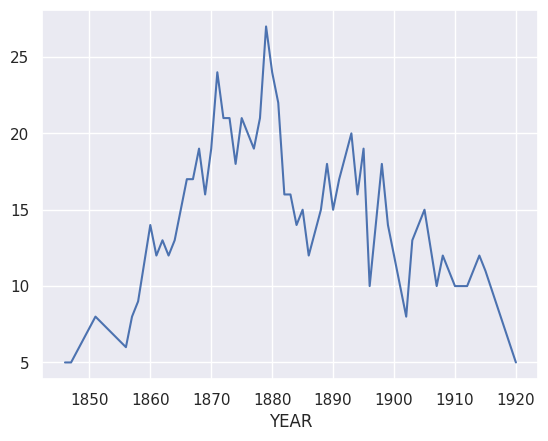

In [ ]:
df[df['female_person'] == True].groupby(['YEAR']).size().plot()

<Axes: xlabel='YEAR'>

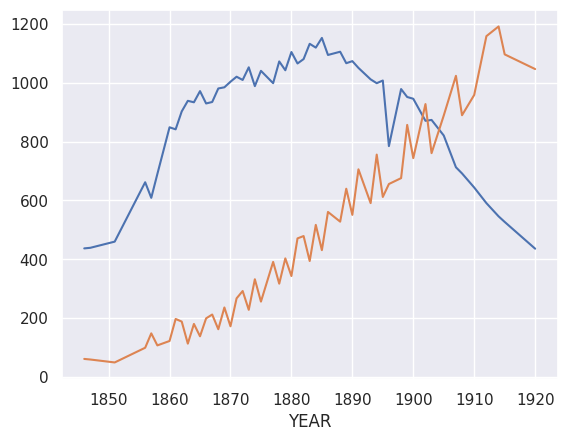

In [ ]:
df.groupby(['YEAR'])['PERSONS'].nunique().plot()
df.groupby(['YEAR'])['ORGANIZATIONS'].nunique().plot()

# Fin.